### Линейная регрессия с 1-й переменной

Критерии применимости лин.регрессии:

1.Гомоскедатичность("постоянность" дисперсии)

2.Ошибка должна иметь нормальное распределение и быть независимой(отсутствие выбросов)

3.Отсутствие мультиколлинеарности(решается с помощью PCA)
    
- Линейная модель: $\hat y = weight \cdot x + bias$

- Функция потерь: средняя сумма квадратов отклонения от предсказания от реального значения по всем объектов из обучающей выборки

- $MSE = \sum_{i=0}^{n} (\hat y - y) ^ 2 $

- $MSE(w) \to \min_w$

### Применение:
    зависимость продаж от объема рекламы
    вероятность победы в 1-м тайме от победы в матче
    зависимость веса от роста

### Метод наименьших квадратов

$MSE = 1 \!/ n \sum(weight \cdot x_i + bias - y_i) ^2$

Нужно найти 2 неизвестных - вес и смещение

$\frac{\partial MSE}{\partial bias} = 2  \!/ n \sum (weight \cdot x_i + bias - y_i) = 0$

$\frac{\partial MSE}{\partial weight} = 2  \!/ n \sum x_i (weight \cdot x_i + bias - y_i) = 0$





### Решаем 1-е уравнение


$weight \sum x_i + n \cdot bias - \sum y_i = 0$ (раскрыли скобки за суммой)

$bias = \sum y_i / n - weight \sum x_i / n$

$bias = \overline{y} - weight \cdot \overline{x}$

### Решаем 2-е уравнение

$\sum x_i (weight \cdot x_i + bias - y_i) = 0$

$weight \sum x_i ^ 2 +  bias \sum x_i - \sum x_i y_i = 0$

Подставляем вместо bias решение 1-го уравнения

$weight \sum x_i ^ 2 +  (\overline{y} - weight \cdot \overline{x}) \sum x_i - \sum x_i y_i = 0$

$weight \sum x_i ^ 2 +  \overline{y}\sum x_i - weight \cdot \overline{x}\sum x_i - \sum x_i y_i = 0$

$weight (\sum x_i ^2 - \overline{x} \sum x_i) = \sum x_i y_i - \overline{y}\sum x_i$

Можем вес считать по этой формуле, т.к.  $ х,y$   нам известны в каждой точке

$weight = (\sum x_i y_i - \overline{y}\sum x_i) / (\sum x_i ^2 - \overline{x} \sum x_i)$

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np

import matplotlib.pyplot as plt


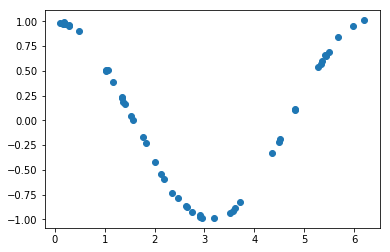

In [2]:
points = 50
x = np.random.uniform(0, np.pi*2, points)
y = np.cos(x) + np.random.normal(0, 0.01, points)
plt.plot(x, y, 'o')

In [3]:
X = np.array([x]).T
lreg = LinearRegression()
lreg.fit(X, y)
y_linear = lreg.predict(X)
print(lreg.coef_)
print(lreg.intercept_)#bias


[-0.04484406]
0.18096431205375302


# Кажется что не очень подходит

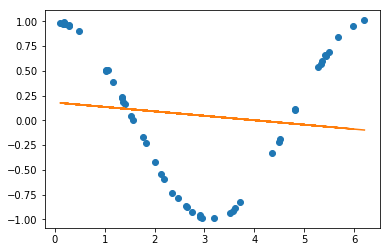

In [4]:
plt.plot(x, y, 'o')
plt.plot(x, y_linear)

# Попробуем полином

$\hat y =w_0 \cdot x ^ 3 + w_1 \cdot x ^ 2 + w_2 \cdot x + bias$

Можем представить его как 3 переменные, одна - $х$, вторая  $х^2$, третья  $х^3$

$\hat y = w_0 \cdot x_0 +  w_1 \cdot x_1 + w_2 \cdot x_2 + bias$

In [6]:
X_cube = np.zeros((points, 3))
X_cube[:, 0] = x ** 3
X_cube[:, 1] = x ** 2
X_cube[:, 2] = x
X_cube

array([[2.39075521e+02, 3.85203367e+01, 6.20647538e+00],
       [1.66151204e+02, 3.02228671e+01, 5.49753282e+00],
       [1.53047429e+02, 2.86121631e+01, 5.34903385e+00],
       [5.15841155e+01, 1.38572587e+01, 3.72253391e+00],
       [6.50214637e-03, 3.48367657e-02, 1.86646098e-01],
       [1.60212069e+02, 2.94982886e+01, 5.43123269e+00],
       [1.80693889e+01, 6.88592536e+00, 2.62410468e+00],
       [2.44699538e+01, 8.42859978e+00, 2.90320509e+00],
       [4.72528736e+01, 1.30702978e+01, 3.61528668e+00],
       [1.59538397e+02, 2.94155394e+01, 5.42360945e+00],
       [2.54101911e-02, 8.64314809e-02, 2.93992314e-01],
       [2.14685055e+02, 3.58537463e+01, 5.98779979e+00],
       [8.23074744e+00, 4.07655072e+00, 2.01904698e+00],
       [8.65737746e-03, 4.21622943e-02, 2.05334591e-01],
       [1.85218466e+01, 7.00040000e+00, 2.64582690e+00],
       [1.31068417e+01, 5.55902598e+00, 2.35775868e+00],
       [1.05653733e+01, 4.81492912e+00, 2.19429468e+00],
       [1.11947348e+02, 2.32278

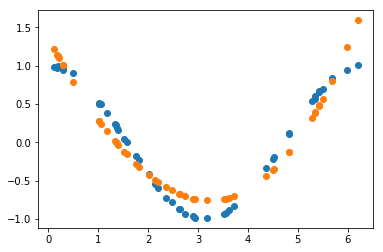

In [9]:
X_cube = np.zeros((points, 3))
X_cube[:, 0] = x ** 3
X_cube[:, 1] = x ** 2
X_cube[:, 2] = x
lreg.fit(X_cube, y)

y_cube = lreg.predict(X_cube)
plt.plot(x, y, 'o')
#plt.plot(x, y_linear)
plt.plot(x, y_cube, 'o')

In [10]:
from sklearn.preprocessing import PolynomialFeatures

### Позволяет использовать не одну,а несколько переменных

In [11]:
X_polyfit = PolynomialFeatures(degree=3, include_bias=False).fit(X)
X_polyfit

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)

### Возводит переменные в нужную степень

In [16]:
X_poly = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)

In [18]:
X_poly[0]

array([  6.20647538,  38.52033669, 239.07552143])

In [19]:
X_cube[0]

array([239.07552143,  38.52033669,   6.20647538])

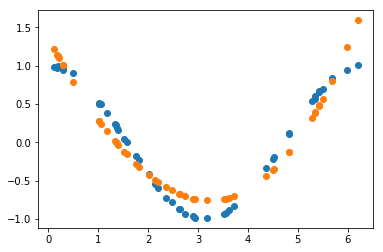

In [20]:
lreg.fit(X_poly, y)
y_poly = lreg.predict(X_poly)
plt.plot(x, y, 'o')
plt.plot(x, y_cube, 'o')

### Линейная регрессия с n переменными

In [21]:
import pandas as pd
cols=['date','team1','team2','sum','home','aw','prob','hwin','cur6','res']
NHL_m05 = pd.read_excel('Count_bet_current_season/NHL-0,5.xlsx')[430:460][cols]
NHL_m05.insert(9,'bias', np.random.normal(0, 0.03, 30))
NHL_m05

,date,team1,team2,sum,home,aw,prob,hwin,cur6,bias,res
430,2016-03-05,Сан-Хосе,Ванкувер,0.576923,0.553571,0.395833,0.547476,0.510204,0.735254,-0.008586,-2
431,2016-03-05,Тампа-Бэй,Каролина,0.574074,0.574074,0.425926,0.625747,0.627451,0.765197,0.032026,0
432,2016-03-05,Филадельфия,Коламбус,0.510000,0.456522,0.444444,0.589605,0.581818,0.419128,0.022131,6
433,2016-03-06,Чикаго,Детройт,0.533333,0.568966,0.510638,0.649001,0.603774,0.531765,-0.008802,3
434,2016-03-07,Анахайм,Вашингтон,0.428571,0.618182,0.754386,0.517645,0.480769,0.593640,-0.000496,0
435,2016-03-07,Колорадо,Аризона,0.544715,0.484375,0.389831,0.598983,0.586207,0.595819,-0.066494,2
436,2016-03-08,Каролина,Оттава,0.495238,0.425926,0.431373,0.525966,0.553571,0.529183,0.019172,0
437,2016-03-08,Тампа-Бэй,Бостон,0.504505,0.563636,0.553571,0.455755,0.450980,0.525263,0.037482,0
438,2016-03-10,Бостон,Каролина,0.563636,0.553571,0.425926,0.575086,0.553571,0.644757,0.027141,0
439,2016-03-10,Детройт,Виннипег,0.531532,0.489796,0.435484,0.542785,0.535714,0.629353,0.018182,1


Линейная модель: $\hat y = \sum w_i x_i + bias = \sum w_i x_i + w_{n_{features} + 1} \cdot 1$

X - матрица объект-признак (n_samples x (n_features + 1)). В нашем случае 30 х (6+1)

$\hat{\vec y}$ - вектор предсказанных вещественных лейблов (n_samples)

$\vec w$ - вектор коэф. линейной регресии (n_features + 1)

Каждое наблюдение, состоящее из 6 переменных, умножаем нас вектор весов получаем $у$.

Проходим по всем 30 наблюдениям -получаем вектор из 30 $y$

$\hat{\vec y} = X\cdot \vec w$

Функция потерь: средняя сумма квадратов отклонения от предсказания от реального значения по всем объектов из обучающей выборки. 

$RSS$ - residual sum of squares

$RSS$  -это не что иное, как норма вектора ошибки в квадрате


$RSS = ||X \vec w - \vec y|| ^ 2 = ||\hat{\vec y} - \vec y|| ^ 2 = \sum (\hat y_i - y_i)^2 = (X \vec w - y)^T (X \vec w -y)$

Транспонирование нужно,т.к умножение будет производится по правилу строка на столбец

$Loss(\vec w) = (X \vec w - y)^T (X \vec w -y) \to min_{w_1,...,w_{n_{features} + 1}} $

$\frac{\partial Loss}{\partial{\vec w}} = -2 X^T (\vec y - X \vec w)$ 

$-2 X^T (\vec y - X \vec w)$ = 0

$X^T\vec y = X^TX \vec w$ 

Умножаем на обратную матрицу $(X^TX)^{-1}$

$(X^TX)^{-1}X^T\vec y = (X^TX)^{-1}X^TX \vec w$

Т.к $(X^TX)^{-1}X^TX$  -единичная матрица, получаем:

$(X^TX)^{-1}X^T\vec y = \vec w$ если все столбцы(переменные) линейно независимы, т.е существует матрица обратная $X^TX$

In [22]:
NHL_m05

,date,team1,team2,sum,home,aw,prob,hwin,cur6,bias,res
430,2016-03-05,Сан-Хосе,Ванкувер,0.576923,0.553571,0.395833,0.547476,0.510204,0.735254,-0.008586,-2
431,2016-03-05,Тампа-Бэй,Каролина,0.574074,0.574074,0.425926,0.625747,0.627451,0.765197,0.032026,0
432,2016-03-05,Филадельфия,Коламбус,0.510000,0.456522,0.444444,0.589605,0.581818,0.419128,0.022131,6
433,2016-03-06,Чикаго,Детройт,0.533333,0.568966,0.510638,0.649001,0.603774,0.531765,-0.008802,3
434,2016-03-07,Анахайм,Вашингтон,0.428571,0.618182,0.754386,0.517645,0.480769,0.593640,-0.000496,0
435,2016-03-07,Колорадо,Аризона,0.544715,0.484375,0.389831,0.598983,0.586207,0.595819,-0.066494,2
436,2016-03-08,Каролина,Оттава,0.495238,0.425926,0.431373,0.525966,0.553571,0.529183,0.019172,0
437,2016-03-08,Тампа-Бэй,Бостон,0.504505,0.563636,0.553571,0.455755,0.450980,0.525263,0.037482,0
438,2016-03-10,Бостон,Каролина,0.563636,0.553571,0.425926,0.575086,0.553571,0.644757,0.027141,0
439,2016-03-10,Детройт,Виннипег,0.531532,0.489796,0.435484,0.542785,0.535714,0.629353,0.018182,1


In [25]:
feat = ['sum','home','aw','prob','hwin','cur6','bias']
X_nhl = NHL_m05[feat]
y_nhl = NHL_m05['res']
weight_nhl = np.linalg.inv(X_nhl.transpose().dot(X_nhl)).dot(X_nhl.transpose()).dot(y_nhl)
weight_nhl

array([ 23.00903144,  -2.90228742,   2.87130725,  37.00852481,
       -44.3334029 , -13.14081261,   8.91456729])

In [26]:
NHL_m05['reg_res'] = np.array(X_nhl).dot(weight_nhl)
NHL_m05

,date,team1,team2,sum,home,aw,prob,hwin,cur6,bias,res,reg_res
430,2016-03-05,Сан-Хосе,Ванкувер,0.576923,0.553571,0.395833,0.547476,0.510204,0.735254,-0.008586,-2,0.708217
431,2016-03-05,Тампа-Бэй,Каролина,0.574074,0.574074,0.425926,0.625747,0.627451,0.765197,0.032026,0,-1.663141
432,2016-03-05,Филадельфия,Коламбус,0.510000,0.456522,0.444444,0.589605,0.581818,0.419128,0.022131,6,2.401824
433,2016-03-06,Чикаго,Детройт,0.533333,0.568966,0.510638,0.649001,0.603774,0.531765,-0.008802,3,2.271329
434,2016-03-07,Анахайм,Вашингтон,0.428571,0.618182,0.754386,0.517645,0.480769,0.593640,-0.000496,0,0.270749
435,2016-03-07,Колорадо,Аризона,0.544715,0.484375,0.389831,0.598983,0.586207,0.595819,-0.066494,2,0.003511
436,2016-03-08,Каролина,Оттава,0.495238,0.425926,0.431373,0.525966,0.553571,0.529183,0.019172,0,-0.462072
437,2016-03-08,Тампа-Бэй,Бостон,0.504505,0.563636,0.553571,0.455755,0.450980,0.525263,0.037482,0,1.866883
438,2016-03-10,Бостон,Каролина,0.563636,0.553571,0.425926,0.575086,0.553571,0.644757,0.027141,0,1.095761
439,2016-03-10,Детройт,Виннипег,0.531532,0.489796,0.435484,0.542785,0.535714,0.629353,0.018182,1,0.288424


In [27]:
lr = LinearRegression(fit_intercept=False)
lr = lr.fit(X_nhl, y_nhl)
{x:y for x,y in zip(feat,lr.coef_)}

{'sum': 23.009031440909062,
 'home': -2.9022874218835195,
 'aw': 2.871307245704019,
 'prob': 37.00852480964938,
 'hwin': -44.33340290075936,
 'cur6': -13.140812607592023,
 'bias': 8.914567288221017}

Что будет, если

$ rank(X) < n_{features} + 1$ 

$(X^TX)^{-1}X^T\vec y = \vec w$ (1')

У уравнения (1') нет единственного решения

In [32]:
X_lin = np.zeros((3, 3))
X_lin[:, 0] = [1,2,1]
X_lin[:, 1] = [2,4,2]
X_lin[:, 2] = np.random.randint(0,20,3)
y = np.random.normal(0, 1, 3)
X_lin


array([[ 1.,  2., 18.],
       [ 2.,  4., 12.],
       [ 1.,  2., 16.]])

In [31]:
np.linalg.matrix_rank(X_lin)

3

In [34]:
weight = np.linalg.inv(X_lin.transpose().dot(X_lin)).dot(X_lin.transpose()).dot(y)
weight

array([-3.8346474e+16,  1.9173237e+16,  0.0000000e+00])

Откинуть линейно зависимые признаки! Feature Selection! Если при этом $rank(X) = n_{selectedfeatures} + 1$, то все окей!

$n_{samples} < n_{selectedfeatures} + 1$ (предсказываем склонность к заболеванию человека в зависимости от его генов)


In [35]:
X_lin = np.zeros((3, 4))
X_lin[:, 0] = np.random.randint(0,20,3)
X_lin[:, 1] =  np.random.randint(0,20,3)
X_lin[:, 2] = np.random.randint(0,20,3)
X_lin[:, 3] = np.random.randint(0,20,3)
y = np.random.normal(0, 1, 3)
X_lin


array([[ 8.,  3.,  8., 17.],
       [ 1., 19.,  6., 18.],
       [ 8., 16.,  2., 19.]])

In [36]:
np.linalg.matrix_rank(X_lin)

3

bias характеризуеть недообучение, а variance характеризует переобучение


Ridge Regression 

L2 Regularization(Ridge):  давайте выберем решение из множества решений $\vec w$ так, чтобы $\sum w_i ^2$ была минимальна ($\sum w_i ^2 = C$)

$(X^TX + \lambda E)^{-1}X^T\vec y = \vec w$ 

$E$-единичная матрица



In [40]:
X_lin = np.zeros((3, 3))
X_lin[:, 0] = [1,2,1]
X_lin[:, 1] = [2,4,2]
X_lin[:, 2] = np.random.randint(0,20,3)
y = np.random.normal(0, 1, 3)
X_lin+0.5*np.eye(3)

array([[ 1.5,  2. , 14. ],
       [ 2. ,  4.5,  9. ],
       [ 1. ,  2. , 16.5]])

$RSS + \lambda \sum w_i^ 2 \to \min_{\vec w}$ 


1. Слишком большой кэф при ридж нельзя иначе сумма будет большая.
2. При большой ламбде мы больше сосредоточены, что занизить кэффы а не RSS, а значит уменьшаем разброс(т.к никакая переменная не имеет решающего значения). 
3. Чем больше лямбда, тем менее чувствительна функция к изменению переменных и в итоге стремится к одному прогнозу(нулю, но не достигает его) для всех весов(линия параллельна оси х). Т.о смысл ридж регрессии сделать модель более устойчивой, особенно когда мало сэмплов и много коррелирующих данных.Модель не дает сделать какой-то параметр сильно значимым




Lasso regression(Least Absolute Selection and Shrinkage Operator)

$RSS + \lambda \sum |w_i| \to \min_{\vec w}$ 

1. Если кэф близок к нулю, то мы получаем обычную задачу оптимизации RSS

2. Если кэф стремится к бесконечности, то сумма кэффов стремится к нулю. Мы можем  обнулить те веса, которые меньше всего значимы. 

Т.о этот метод позволяет убирать ненужные переменные, обнуляя их кэффы при регуляризации.
Луше использовать когда у нас много разреженных данных

ElasticNet regression
 
$RSS + \lambda\sum |w_i| + \lambda\sum w_i^ 2 \to \min_{\vec w}$ 

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor

Отличие $SGDregressor$ в том, что :

1.Функция оптимизируется не всем наблюдениям, а по случайно выбранному куску

2.Мы можем в качестве функции потерь выбирать не только $MSE$ ,но и другие метрики

$MSE = \frac{1}{n}\sum|\hat y - y|^2$

$MAE = \frac{1}{n}\sum|\hat y - y|$


$MAPE = \frac{1}{n}\sum|\frac{\hat y - y}{y}|$


MAPE более интерпретируема, т.к показывает процентное изменение базового значения

In [45]:
mae_reg = SGDRegressor(loss="epsilon_insensitive", alpha=0, l1_ratio=0, epsilon=0.0000000001,max_iter = 500)
mse_reg = SGDRegressor(loss="squared_loss", alpha=0, l1_ratio=0,max_iter = 500)

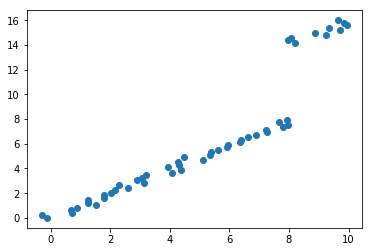

In [43]:
y = np.linspace(0, 10, 50)
x = y + np.random.normal(0, 0.3, 50)
y[-10:] += 6
plt.plot(
    x, # feature
    y, # target
    'o'
)


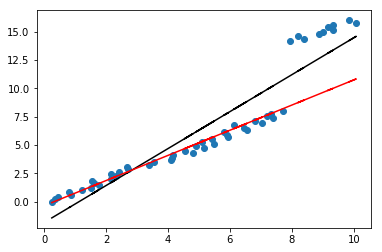

In [46]:
y = np.linspace(0, 10, 50)
x = y + np.random.normal(0, 0.3, 50)
y[-10:] += 6
X = np.array([x]).T
y_mae_reg = mae_reg.fit(X, y).predict(X)
y_mse_reg = mse_reg.fit(X, y).predict(X)
plt.plot(
    x, # feature
    y, # target
    'o'
)

plt.plot(
    x, # feature
    y_mse_reg, # target
    c="black"
)

plt.plot(
    x, # feature
    y_mae_reg, # target
    c="red"
)

$MSE$ более чувствительна к выбросам(хуже предсказывает), чем $MАE$. 

Чем дальше предсказание от выбросов, тем больше ошибка, значит предикт будет сдвигаться к аномалиям)

In [47]:
MAE1 =[0,0,0,5]
MAE2 = [1,1,1,4]
sum(MAE1),sum(MAE2)

(5, 7)

In [48]:
sum([i**2 for i in MAE1]),sum([i**2 for i in MAE2])

(25, 19)

In [49]:
tennis_reg = pd.read_excel('Tennis-reg.xlsx')

In [50]:
tennis_reg.fillna(0.5,inplace = True)
tennis_reg['Game_dif'] = tennis_reg['Games1']-tennis_reg['Games2']
tennis_reg

,Date,Loc,Rd,PL1,PL2,Tot r,Surf rate,2m rate,Surf1,Surf2,...,Вероятности,Unnamed: 23,2m point,Diff,Point rate,Rank1,Rank2,Win,Loss,Game_dif
0,27.10.2014,Charlottesville,R32,Tim Smyczek,Liam Broady,0.802878,0.812064,0.682035,5.456604,1.262821,...,0.0,1.0,0.577167,-3.584054,0.722740,73.0,235.0,0.0,1.0,-4
1,27.10.2014,Eckental,R16,Andrea Arnaboldi,Johannes Haerteis,0.786189,0.360947,0.650108,3.388889,6.000000,...,0.0,1.0,0.826923,2.782609,0.940678,165.0,885.0,1.0,0.0,5
2,27.10.2014,Eckental,R16,Dustin Brown,Niels Desein,0.777655,0.730364,0.668385,4.937736,1.822917,...,0.0,1.0,0.657483,-4.029583,0.788614,78.0,164.0,0.0,1.0,-3
3,27.10.2014,Eckental,R16,Evgeny Donskoy,Nikoloz Basilashvili,0.626276,0.594812,0.702300,3.038393,2.069767,...,0.0,1.0,0.787557,-0.981641,0.639746,65.0,198.0,1.0,0.0,4
4,27.10.2014,Eckental,R32,Aslan Karatsev,Johannes Haerteis,0.794911,1.000000,0.878788,2.028571,0.000000,...,0.0,1.0,0.950820,-2.067164,0.945392,221.0,885.0,0.0,1.0,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7420,19.11.2018,Andria,R32,Ugo Humbert,Goncalo Oliveira,0.664620,0.726313,0.859789,3.032927,1.142857,...,0.0,1.0,0.867390,-1.617358,0.686915,92.0,194.0,1.0,0.0,4
7421,19.11.2018,Andria,R32,Zdenek Kolar,Uladzimir Ignatik,0.528427,0.514867,0.205882,2.350000,2.214286,...,0.0,1.0,0.181818,-0.505315,0.536207,208.0,129.0,0.0,1.0,-4
7422,19.11.2018,Andria,R32,Zdenek Kolar,Uladzimir Ignatik,0.528427,0.514867,0.205882,2.350000,2.214286,...,0.0,1.0,0.181818,-0.178022,0.536207,208.0,129.0,0.0,1.0,-4
7423,19.11.2018,Andria,SF,Quentin Halys,Filippo Baldi,0.523013,0.585812,0.396078,3.706604,2.620690,...,0.5,0.5,0.396078,-0.871222,0.534256,102.0,174.0,0.0,1.0,-4


In [52]:
feat = ['Tot r', 'Surf rate', '2m rate',
       'Surf1', 'Surf2', 'Total1', 'Total2', 'Poi_s1', 'Poi_s2', 'Poi_t1',
       'Poi_t2', '2 mon1', '2 mon2', 'poi_2m1', 'poi_2m2','2m point', 'Diff', 'Point rate','Rank1','Rank2']


20

In [53]:
X = tennis_reg[feat]
y = tennis_reg['Game_dif']

In [54]:
lr = LinearRegression(fit_intercept=True)
lr = lr.fit(X, y)
crit = {x:y for x,y in zip(feat,lr.coef_)}
{x:crit[x] for x in sorted(crit,key = crit.get,reverse=True)}


{'Tot r': 9.877486336490216,
 '2m point': 4.373077839323,
 'Surf rate': 0.5110457313794557,
 'Surf2': 0.14550112898078982,
 '2 mon2': 0.09484183679617565,
 'Total1': 0.009504334935465165,
 'Poi_t2': 0.005487365966795781,
 'Poi_s1': 0.004822506465460998,
 'poi_2m1': 0.001559703623931094,
 'Rank2': 0.0010226621448982676,
 'Diff': -0.0007074859335992273,
 'Rank1': -0.0010562132068126645,
 'Poi_t1': -0.001158111007690966,
 'poi_2m2': -0.006221348741559139,
 'Poi_s2': -0.008832857688498496,
 '2 mon1': -0.021016589261587053,
 'Surf1': -0.06942610255517903,
 'Total2': -0.23773054278416597,
 'Point rate': -2.1584839870212025,
 '2m rate': -2.223334753309879}

In [90]:
ridge = Ridge(alpha=5).fit(X, y)
crit = {x:y for x,y in zip(feat,ridge.coef_)}
{x:crit[x] for x in sorted(crit,key = crit.get,reverse=True)}

{'Tot r': 5.568104957396469,
 '2m point': 3.4305564042507104,
 'Surf rate': 1.4004781286557586,
 'Total1': 0.2333368087183508,
 'Surf2': 0.22001917510868982,
 '2 mon2': 0.15634257534266058,
 'Poi_t2': 0.00821869355317919,
 'poi_2m1': 0.004830592876177468,
 'Poi_s1': 0.004764389902141649,
 'Rank2': 0.0009739833933670984,
 'Rank1': -0.0012203532213346012,
 'Diff': -0.0018157055040486487,
 'Poi_t1': -0.002813277073343672,
 'Poi_s2': -0.008785710121255258,
 'poi_2m2': -0.010486123271211609,
 '2 mon1': -0.0682790177189893,
 'Surf1': -0.12392599026413631,
 'Point rate': -0.314436682738561,
 'Total2': -0.6219916947872414,
 '2m rate': -1.0311701288799748}

In [93]:
lasso = Lasso(alpha=0.5).fit(X, y)
crit = {x:y for x,y in zip(feat,lasso.coef_)}
{x:crit[x] for x in sorted(crit,key = crit.get,reverse=True)}


{'poi_2m1': 0.014203127225349887,
 'Poi_s1': 0.005068189992557907,
 'Rank2': 0.0020100974341571718,
 'Poi_t1': 0.00044025337403180806,
 'Tot r': 0.0,
 'Surf rate': 0.0,
 '2m rate': 0.0,
 'Surf1': 0.0,
 'Surf2': -0.0,
 'Total1': 0.0,
 'Total2': -0.0,
 '2 mon1': 0.0,
 '2 mon2': -0.0,
 '2m point': 0.0,
 'Diff': -0.0,
 'Point rate': 0.0,
 'Poi_t2': -0.0002198447938306055,
 'Rank1': -0.002719256936989752,
 'Poi_s2': -0.009048015479382365,
 'poi_2m2': -0.02104850685488433}

In [85]:
lasso.intercept_

1.2555174769207338

In [68]:
sum([i*j for i,j in zip(X.loc[0],lasso.coef_)])+lasso.intercept_

2.4831519158924786

In [91]:
np.std(lasso.predict(X)),np.std(ridge.predict(X))

(1.2487867371782975, 1.3031160569225604)

In [94]:
tennis_reg['lasso'] = lasso.predict(X)
tennis_reg['ridge'] = ridge.predict(X)
tennis_reg.loc[:20,['Date','Loc','Rd','PL1','PL2','Tot r','Game_dif','lasso','ridge']]

,Date,Loc,Rd,PL1,PL2,Tot r,Game_dif,lasso,ridge
0,27.10.2014,Charlottesville,R32,Tim Smyczek,Liam Broady,0.802878,-4,2.131219,2.960054
1,27.10.2014,Eckental,R16,Andrea Arnaboldi,Johannes Haerteis,0.786189,5,3.665764,4.404657
2,27.10.2014,Eckental,R16,Dustin Brown,Niels Desein,0.777655,-3,2.372156,2.753080
3,27.10.2014,Eckental,R16,Evgeny Donskoy,Nikoloz Basilashvili,0.626276,4,1.823636,2.057749
4,27.10.2014,Eckental,R32,Aslan Karatsev,Johannes Haerteis,0.794911,-4,3.613192,4.192463
5,27.10.2014,Geneva,F,Marcos Baghdatis,Michal Przysiezny,0.620455,6,-1.634477,-0.672639
6,27.10.2014,Geneva,R32,Jiri Vesely,Gerald Melzer,0.740100,4,2.122463,2.758714
7,27.10.2014,Geneva,R32,Michael Berrer,Sandro Ehrat,0.843853,1,2.657473,3.195152
8,27.10.2014,Geneva,R32,Viktor Troicki,Marco Cecchinato,0.713041,7,4.767943,4.129714
9,27.10.2014,Reunion Island,R16,Robin Haase,Mate Pavic,0.729503,5,2.814877,2.937294


In [95]:
sum((tennis_reg.Game_dif - tennis_reg.ridge)**2)/len(tennis_reg)

22.43319002230585

In [96]:
sum((tennis_reg.Game_dif - tennis_reg.lasso)**2)/len(tennis_reg)

22.995617888625286

In [97]:
mae_reg.fit(X, y)
crit = {x:y for x,y in zip(feat,mae_reg.coef_)}
{x:crit[x] for x in sorted(crit,key = crit.get,reverse=True)}


{'2m point': 0.8644265017286858,
 '2m rate': 0.5263614187764843,
 'Total1': 0.46988702399260895,
 'Tot r': 0.4644536082103205,
 'Surf rate': 0.3830772223022588,
 'Point rate': 0.2650110521008392,
 'Surf2': 0.24168505010721794,
 '2 mon2': 0.1532464692248328,
 'Rank1': 0.07325671421810359,
 'Poi_s1': 0.06708084188086158,
 'poi_2m1': 0.05165958151943502,
 'Poi_t1': 0.02298532908845602,
 'Diff': 0.013041386006977613,
 'poi_2m2': -0.0043150648919493655,
 'Rank2': -0.027126026216230836,
 'Poi_t2': -0.02960030644331105,
 'Surf1': -0.034033842740043105,
 'Poi_s2': -0.06583932866624609,
 '2 mon1': -0.17512307620816264,
 'Total2': -0.8845938054429708}

In [98]:
mae_reg.intercept_

array([-0.00810405])

In [101]:
tennis_reg['mae'] = mae_reg.predict(X)
tennis_reg.loc[:20,['Date','Loc','Rd','PL1','PL2','Tot r','Game_dif','lasso','ridge','mae']]

,Date,Loc,Rd,PL1,PL2,Tot r,Game_dif,lasso,ridge,mae
0,27.10.2014,Charlottesville,R32,Tim Smyczek,Liam Broady,0.802878,-4,2.131219,2.960054,21.322818
1,27.10.2014,Eckental,R16,Andrea Arnaboldi,Johannes Haerteis,0.786189,5,3.665764,4.404657,6.429662
2,27.10.2014,Eckental,R16,Dustin Brown,Niels Desein,0.777655,-3,2.372156,2.753080,27.283705
3,27.10.2014,Eckental,R16,Evgeny Donskoy,Nikoloz Basilashvili,0.626276,4,1.823636,2.057749,9.301554
4,27.10.2014,Eckental,R32,Aslan Karatsev,Johannes Haerteis,0.794911,-4,3.613192,4.192463,5.000456
5,27.10.2014,Geneva,F,Marcos Baghdatis,Michal Przysiezny,0.620455,6,-1.634477,-0.672639,2.621939
6,27.10.2014,Geneva,R32,Jiri Vesely,Gerald Melzer,0.740100,4,2.122463,2.758714,19.867960
7,27.10.2014,Geneva,R32,Michael Berrer,Sandro Ehrat,0.843853,1,2.657473,3.195152,14.583273
8,27.10.2014,Geneva,R32,Viktor Troicki,Marco Cecchinato,0.713041,7,4.767943,4.129714,22.019548
9,27.10.2014,Reunion Island,R16,Robin Haase,Mate Pavic,0.729503,5,2.814877,2.937294,10.391841
